# Exercício final do bloco - Limpeza e Tratamento de dados (Prática em Python)

In [1]:
import pandas as pd
import seaborn as srn
import statistics  as sts

In [2]:
from google.colab import files
uploaded = files.upload()

Saving tempo.csv to tempo.csv


In [3]:
dataset = pd.read_csv("tempo.csv", sep = ";")
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


### Explorando dados categóricos

In [5]:
# Aparencia
group = dataset.groupby(["Aparencia"]).size()
group

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

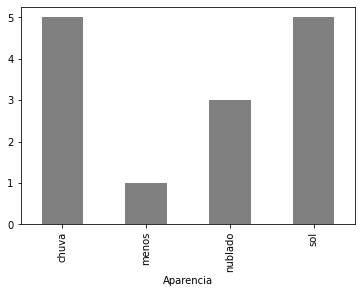

In [6]:
group.plot.bar(color = "gray")

In [7]:
# Vento
group = dataset.groupby(['Vento']).size()
group

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<Axes: xlabel='Vento'>

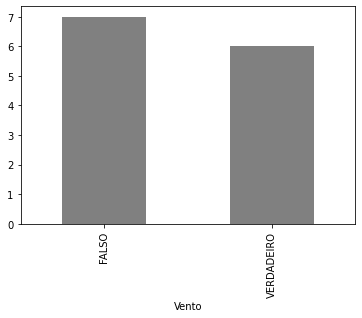

In [9]:
group.plot.bar(color = "gray")

In [10]:
# Jogar
group = dataset.groupby(["Jogar"]).size()
group

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

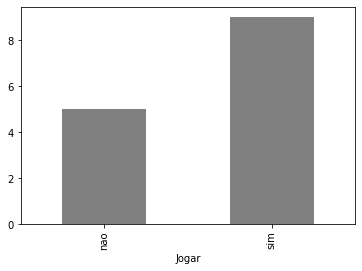

In [11]:
group.plot.bar(color = "gray")

### Explorar colunas numéricas

In [12]:
# Temperatura
dataset["Temperatura"].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

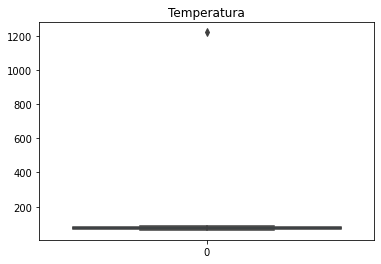

In [13]:
srn.boxplot(dataset["Temperatura"]).set_title("Temperatura")

Text(0.5, 1.0, 'Temperatura')

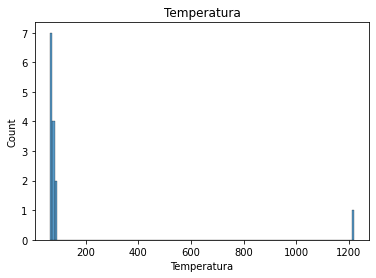

In [16]:
srn.histplot(dataset["Temperatura"]).set_title("Temperatura")

In [17]:
# Umidade
dataset["Umidade"].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

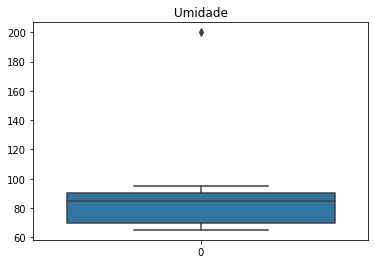

In [18]:
srn.boxplot(dataset["Umidade"]).set_title("Umidade")

Text(0.5, 1.0, 'Umidade')

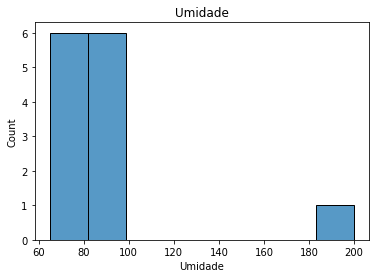

In [20]:
srn.histplot(dataset["Umidade"]).set_title("Umidade")

In [21]:
# Contando valores NA
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [22]:
# Aparencia valor invalido
group = dataset.groupby(["Aparencia"]).size()
group

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [23]:
dataset.loc[dataset["Aparencia"] ==  "menos", "Aparencia"] = "Sol"
# Visualiza o resultado
group = dataset.groupby(["Aparencia"]).size()
group

Aparencia
Sol        1
chuva      5
nublado    3
sol        5
dtype: int64

In [24]:
# Temperatura fora do dominio
dataset["Temperatura"].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [25]:
# Visualizar 
dataset.loc[(dataset["Temperatura"] <  -130 )  | ( dataset["Temperatura"] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [26]:
# Calular a mediana
mediana = sts.median(dataset["Temperatura"])
mediana

73.5

In [27]:
# Substituir
dataset.loc[(dataset["Temperatura"] <  -130 )  | ( dataset["Temperatura"] >  130), "Temperatura"] = mediana

In [28]:
# Verificando se ainda existem idades fora do domínio
dataset.loc[(dataset["Temperatura"] <  -130 )  | ( dataset["Temperatura"] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [29]:
# Umidade, dominio e NAs
group = dataset.groupby(["Umidade"]).size()
group

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [30]:
# Total de NAs
dataset["Umidade"].isnull().sum()

1

In [31]:
# Calular a mediana
mediana = sts.median(dataset["Umidade"])
mediana

85.5

In [32]:
# Preenche NAs
dataset["Umidade"].fillna(mediana, inplace = True)

In [33]:
dataset["Umidade"].isnull().sum()

0

In [36]:
# Visualiza de acordo com o dominio
dataset.loc[(dataset["Umidade"] < 0) | (dataset["Umidade"] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [37]:
# Atualiza com a mediana
dataset.loc[(dataset["Umidade"] < 0) | (dataset["Umidade"] > 100), "Umidade"] = mediana

In [38]:
# Visualiza novamente
dataset.loc[(dataset["Umidade"] < 0) | (dataset["Umidade"] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [40]:
# Ventos
group = dataset.groupby(["Vento"]).size()
group

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [41]:
# Total de NAs
dataset["Vento"].isnull().sum()

1

In [42]:
# Preenche NAs
dataset["Vento"].fillna("FALSO", inplace = True)

In [43]:
# Total de NAs
dataset["Vento"].isnull().sum()

0